#Reading Dataset

In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install scipy
#!pip install sklearn
#!pip install dash
#!pip install dash-renderer
#!pip install dash_html_components
#!pip install dash_core_components

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
CarPricesData=pd.read_csv('C:/Users/Pranati/Downloads/CarPricesPrediction-main/CarPricesPrediction-main/CarPricesData.csv')

In [3]:
CarPricesData

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0


In [4]:
print('Shape before deleting duplicate values:', CarPricesData.shape)

Shape before deleting duplicate values: (1436, 10)


In [5]:
# Removing duplicate rows if any
CarPricesData=CarPricesData.drop_duplicates()
print('Shape After deleting duplicate values:', CarPricesData.shape)

Shape After deleting duplicate values: (1435, 10)


<AxesSubplot:>

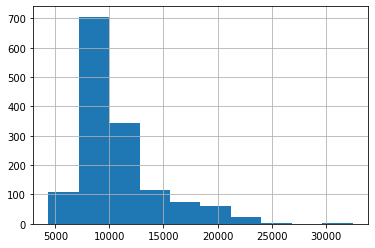

In [78]:
# Creating Bar chart as the Target variable is Continuous
CarPricesData['Price'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

#Data Pre Analysis and Visualization.

In [79]:
CarPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


So,There are some missing values which will be treated later.

In [80]:
# Looking at the descriptive statistics of the data
CarPricesData.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [81]:
CarPricesData.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [82]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(30,10))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

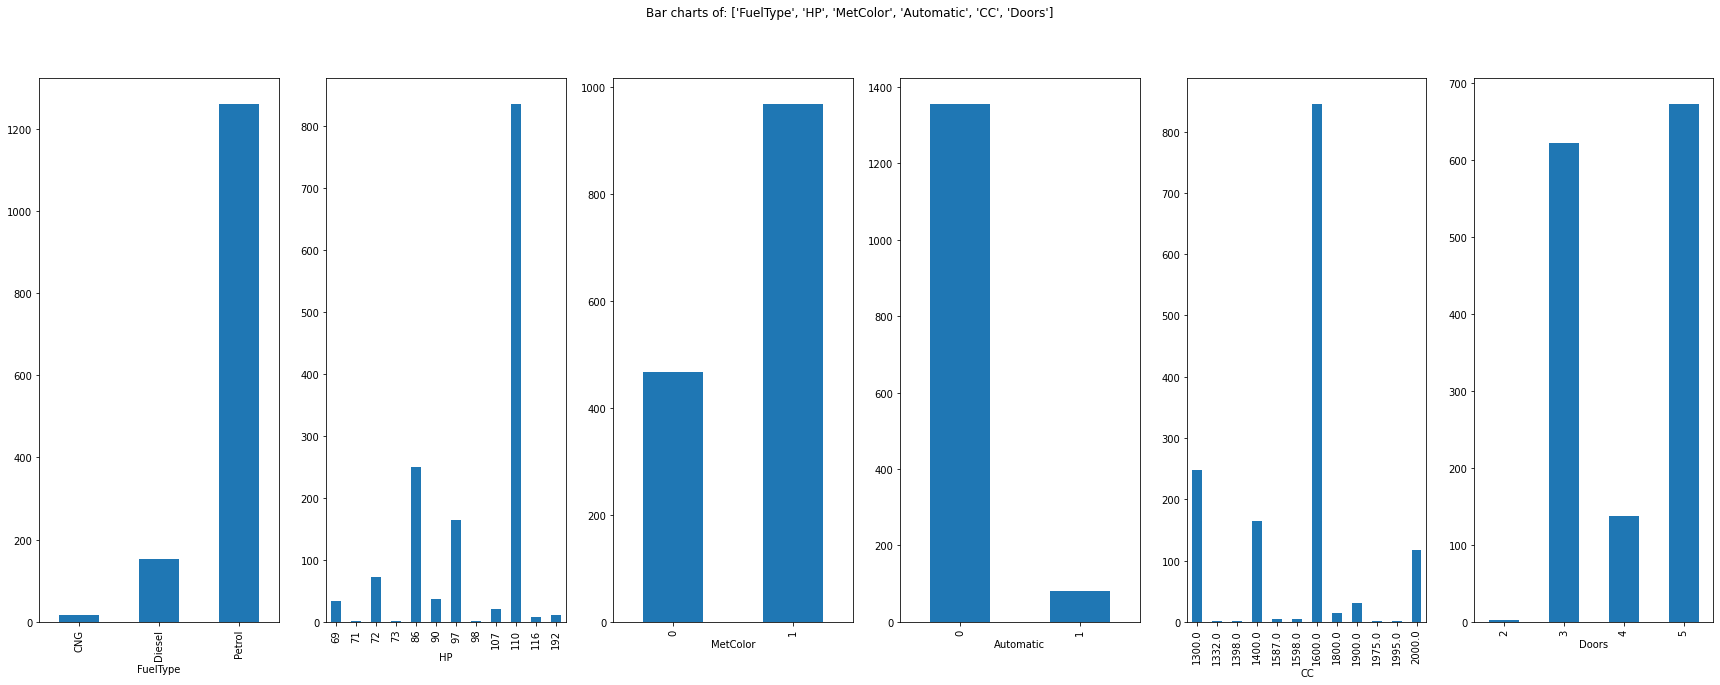

In [83]:
#Plotting all the categorical features' characteristics
PlotBarCharts(inpData=CarPricesData, colsToPlot=['FuelType', 'HP', 'MetColor', 
                                                 'Automatic', 'CC', 'Doors'])

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'KM'}>],
       [<AxesSubplot:title={'center':'Weight'}>, <AxesSubplot:>]],
      dtype=object)

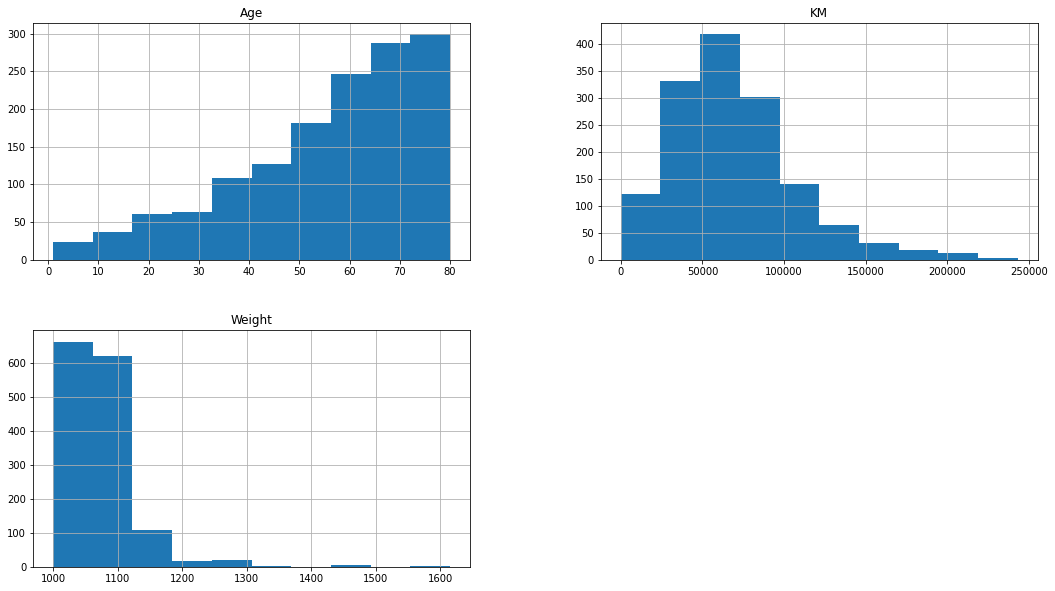

In [84]:
# Plotting histograms of multiple continuous columns together
CarPricesData.hist(['Age','KM','Weight'], figsize=(18,10))

In [85]:
# Finding logical value near 1400
CarPricesData['Weight'][CarPricesData['Weight']<1400].sort_values(ascending=False)

112     1320.0
138     1320.0
115     1280.0
119     1275.0
68      1275.0
         ...  
927     1000.0
1410    1000.0
605     1000.0
1021    1000.0
957     1000.0
Name: Weight, Length: 1428, dtype: float64

In [86]:
# Replacing outliers with nearest logical value
CarPricesData['Weight'][CarPricesData['Weight']>1400]=1320

<AxesSubplot:>

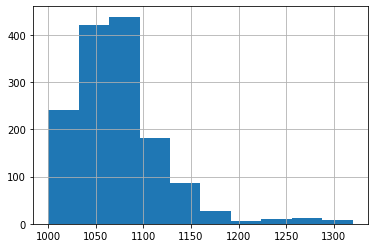

In [87]:
# Histogram for weight after outlier treatment
CarPricesData['Weight'].hist()

In [88]:
# Finding how many missing values are there for each column
CarPricesData.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

I am treating missing values with Median for Continuous values, and Mode for categorical values.

In [89]:
# Treating missing values of categorical variable with MODE value
CarPricesData['FuelType'].fillna(value=CarPricesData['FuelType'].mode()[0], inplace=True)
CarPricesData['CC'].fillna(value=CarPricesData['CC'].mode()[0], inplace=True)

In [90]:
# Treating missing values of continuous variable with Median value
CarPricesData['Weight'].fillna(value=CarPricesData['Weight'].median(), inplace=True)
CarPricesData['Age'].fillna(value=CarPricesData['Age'].median(), inplace=True)

In [91]:
# Checking missing values again after the treatment
CarPricesData.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

#Feature Selection

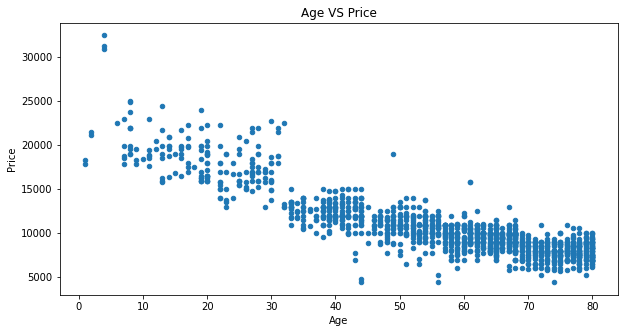

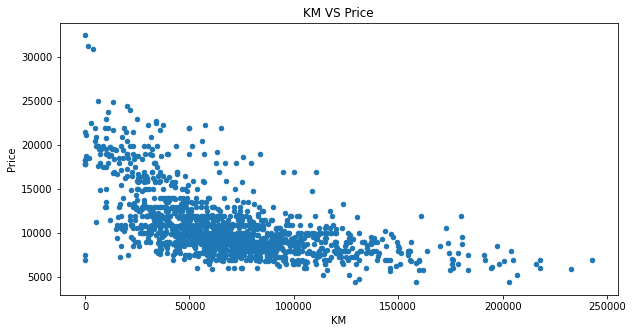

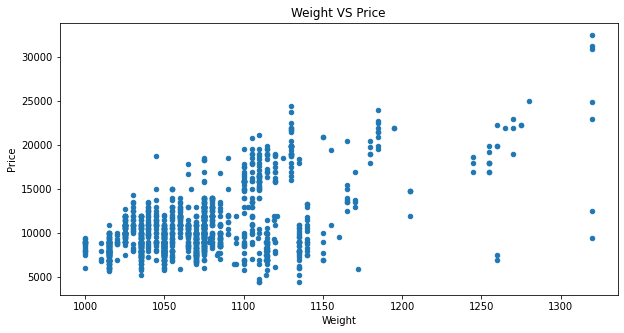

In [92]:
ContinuousCols=['Age','KM','Weight']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    CarPricesData.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

In [93]:
# Calculating correlation matrix
ContinuousCols=['Price','Age','KM','Weight']

# Creating the correlation matrix
CorrelationData=CarPricesData[ContinuousCols].corr()
CorrelationData

,Price,Age,KM,Weight
Price,1.000000,-0.874196,-0.569420,0.589002
Age,-0.874196,1.000000,0.502604,-0.488324
KM,-0.569420,0.502604,1.000000,-0.013607
Weight,0.589002,-0.488324,-0.013607,1.000000


In [94]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable, as here considering thresold 0.5
#there are columns to consider.
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Price     1.000000
Age      -0.874196
KM       -0.569420
Weight    0.589002
Name: Price, dtype: float64

In [95]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [96]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']
FunctionAnova(inpData=CarPricesData, 
              TargetVariable='Price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

FuelType is NOT correlated with Price | P-Value: 0.07590511356326429
HP is correlated with Price | P-Value: 4.403061434008212e-109
MetColor is correlated with Price | P-Value: 4.4173957971674025e-05
Automatic is NOT correlated with Price | P-Value: 0.19897717506836016
CC is correlated with Price | P-Value: 2.566835080246702e-47
Doors is correlated with Price | P-Value: 9.51180734144394e-13


['HP', 'MetColor', 'CC', 'Doors']

In [97]:
#Selecting the useful features.
SelectedColumns=['Age','KM','Weight','HP', 'MetColor', 'CC', 'Doors']

# Selecting final columns
DataForML=CarPricesData[SelectedColumns]
DataForML.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


In [98]:
CarPricesData

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0


#Building Model

In [99]:
TargetVariable='Price'
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

In [100]:
X=DataForML
y=CarPricesData['Price']

In [101]:
X

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3
...,...,...,...,...,...,...,...
1431,69.0,20544,1025.0,86,1,1300.0,3
1432,72.0,19000,1015.0,86,0,1300.0,3
1433,71.0,17016,1015.0,86,0,1300.0,3
1434,70.0,16916,1015.0,86,1,1300.0,3


In [103]:
### Sandardization of data ###
from sklearn.preprocessing import MinMaxScaler
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
#PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [104]:
X

array([[0.27848101, 0.19335471, 0.515625  , ..., 1.        , 1.        ,
        0.33333333],
       [0.27848101, 0.30014938, 0.515625  , ..., 1.        , 1.        ,
        0.33333333],
       [0.29113924, 0.1716468 , 0.515625  , ..., 1.        , 1.        ,
        0.33333333],
       ...,
       [0.88607595, 0.07002086, 0.046875  , ..., 0.        , 0.        ,
        0.33333333],
       [0.87341772, 0.06960934, 0.046875  , ..., 1.        , 0.        ,
        0.33333333],
       [0.94936709, 0.        , 0.35625   , ..., 0.        , 0.42857143,
        1.        ]])

In [49]:
X_train[0]

array([1.        , 0.26131383, 0.15625   , 0.33333333, 1.        ,
       0.42857143, 0.33333333])

In [51]:
X_test

array([[0.62025316, 0.25379117, 0.234375  , ..., 0.        , 0.42857143,
        1.        ],
       [0.92405063, 0.50648768, 0.046875  , ..., 1.        , 0.        ,
        0.33333333],
       [0.98734177, 0.85232038, 0.35625   , ..., 1.        , 0.42857143,
        1.        ],
       ...,
       [0.59493671, 0.58489541, 0.371875  , ..., 0.        , 0.42857143,
        1.        ],
       [0.97468354, 0.12742028, 0.25      , ..., 0.        , 0.42857143,
        0.33333333],
       [0.69620253, 0.53150013, 0.34375   , ..., 0.        , 0.71428571,
        1.        ]])

##Linear Regression

In [31]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.8744771463175195

##### Model Validation and Accuracy Calculations ##########
     Price  PredictedPrice
0  13500.0         11706.0
1      NaN          6418.0
2  13950.0          7097.0
3      NaN         11575.0
4  13750.0          9444.0
Mean Accuracy on test data: 67.11557454533983
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [90.06952395 89.67528946 88.80930703 91.98201782 89.29521126 91.81534649
 91.03912263 87.66514203 90.45440946 88.48621601]

Final Average Accuracy of the model: 89.93


##Decision Tree Regressor

DecisionTreeRegressor(criterion='mse', max_depth=3)
R2 Value: 0.8580834173748909

##### Model Validation and Accuracy Calculations ##########
     Price  PredictedPrice
0  13500.0         10786.0
1      NaN          7958.0
2  13950.0          7958.0
3      NaN         10786.0
4  13750.0          7958.0
Mean Accuracy on test data: 67.12769847275011
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [83.45164595 87.52441085 86.11810534 86.07782878 86.58615835 90.54523664
 91.78645028 85.63224193 91.26690628 89.39986216]

Final Average Accuracy of the model: 87.84


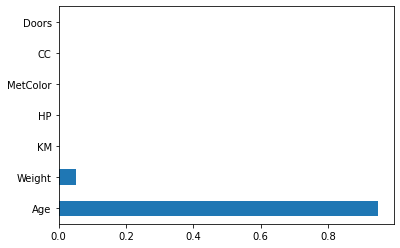

In [32]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

##Random Forest Regressor

RandomForestRegressor(criterion='mse', max_depth=3)
R2 Value: 0.87086696851397

##### Model Validation and Accuracy Calculations ##########
     Price  PredictedPrice
0      NaN          7938.0
1      NaN          9342.0
2      NaN         11180.0
3      NaN          9314.0
4  13750.0          7938.0
Mean Accuracy on test data: 65.81005321630765
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [81.43438352 88.71452341 87.58161975 88.42829987 87.09530518 90.59225937
 92.02499006 85.72240131 91.30515925 89.40647198]

Final Average Accuracy of the model: 88.23


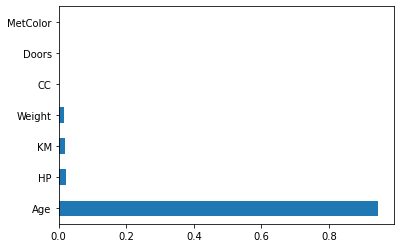

In [33]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=3, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

##KNN

In [33]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9293106199909975

##### Model Validation and Accuracy Calculations ##########
     Price  PredictedPrice
0  13500.0         10550.0
1      NaN          7200.0
2  13950.0          7783.0
3      NaN         10332.0
4  13750.0          9150.0
Mean Accuracy on test data: 66.362364721749
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [78.69377666 88.11361026 89.9149838  88.06697168 87.08841289 90.29056288
 90.37173613 84.50421991 89.3702435  87.46538676]

Final Average Accuracy of the model: 87.39


In [41]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [40]:
# Save the trained model as a pickle string.
saved_model= pickle.dumps(LREG)

NameError: name 'pickle' is not defined

In [42]:
import pickle

In [43]:
# Save the trained model as a pickle string.
saved_model= pickle.dumps(LREG)

In [45]:
loaded_model = pickle.loads(saved_model)

In [52]:
loaded_model.predict([[2,3,4,5,6,7,7]])

array([27510.95219854])

So,here we see that respect to different model 87-89% accuracy is coming, linear regression model gives the most accuracy with its simple algorithm which will reduce time complexity as well, So I choose 'Linear Regression Model' for this dataset Price prediction.

In [45]:
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output,State
import plotly.express as px

In [51]:
app=dash.Dash()
divStyle= {'color':'#FFFFFF','backgroundColor':'#FFA500','width':'70px','height':'20px','text-align': 'center','marginLeft' : '300px',
}
divStyle1= {'color':'#0000FF','backgroundColor':'#00FF00','width':'70px','height':'20px','text-align': 'center','marginLeft' : '100px',
}
divStyle2= {'width':'150px','height':'20px','marginLeft' : '50px','color':'#000','backgroundColor':'#FFFFFF'
}
app.layout=html.Div( style={'backgroundColor': '#000000','height':'100vh'}, children=[
    html.H1("Welcome to Car Price Prediction App",
           style={
               'textAlign':'center',
               'color':'#FFA500'
           }
            ),
    html.H2("Please Enter the required details get the car price",style={
               'color':'#F2F3F5',
                'textAlign':'center'
           }),
    html.Br(),
    html.Br(),
    html.Div(style={'display':'flex'},children=[
    html.Div("Age",style= divStyle),
    html.Div(style={'marginLeft':'50px'},children=[
    dcc.Input(
        id='age',
        type='number',
        value='' 
    ) ])
        ]),
    html.Br(),
    html.Div(style={'display':'flex'},children=[
    html.Div("KM",style= divStyle),
    html.Div(style={'marginLeft':'50px'},children=[
    dcc.Input(
        id='km',
        type='number',
        value='' 
    ) ])
        ]),
    html.Br(),
    html.Div(style={'display':'flex'},children=[
    html.Div("Weight",style= divStyle),
    html.Div(style={'marginLeft':'50px'},children=[
    dcc.Input(
        id='weight',
        type='number',
        value='' 
    ) ])
        ]),
    html.Br(),
    html.Div(style={'display':'flex'},children=[
    html.Div("HP",style= divStyle),
    html.Div(style={'marginLeft':'50px'},children=[
    dcc.Input(
        id='hp',
        type='number',
        value='' 
    ) ]),
        
     #html.Button('Submit',id='submit-button',n_clicks=1,style={'backgroundColor':'#00FF00','marginLeft':'50px'}),
     html.Div("Price",style= divStyle1),
     html.Div("",id='output',style= divStyle2),
        
    
        
        ]),
    html.Br(),
    html.Div(style={'display':'flex'},children=[
    html.Div("MetColor",style= divStyle),
    html.Div(style={'marginLeft':'50px'},children=[
    dcc.Input(
        id='mc',
        type='number',
        value='' 
    ) ])
        ]),
    html.Br(),
    html.Div(style={'display':'flex'},children=[
    html.Div("CC",style= divStyle),
    html.Div(style={'marginLeft':'50px'},children=[
    dcc.Input(
        id='cc',
        type='number',
        value='' 
    ) ])
        ]),
    html.Br(),
    html.Div(style={'display':'flex'},children=[
    html.Div("Doors",style= divStyle),
    html.Div(style={'marginLeft':'50px'},children=[
    dcc.Input(
        id='doors',
        type='number',
        value='' 
    ) ])
        ]),
    """html.Br(),
    html.Br(),
    
    
    html.Div([

        html.Div([
            dcc.Dropdown(
                CarPricesData.columns,
                'KM',
                id='xaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='xaxis-type',
                inline=True
            )
        ], style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                CarPricesData.columns,
                'Price',
                id='yaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='yaxis-type',
                inline=True
            )
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ],style={'marginLeft': '200px','marginRight':'200px'}),

    dcc.Graph(id='indicator-graphic'),
"""
])


@app.callback(
    Output("output", "children"),
    Input("age", "value"),
    Input("km", "value"),
    Input("weight", "value"),
    Input("hp", "value"),
    Input("mc", "value"),
    Input("cc", "value"),
    Input("doors", "value"),
)

def update_output(input1,input2,input3,input4,input5,input6,input7):
    X=PredictorScalerFit.transform([[input1,input2,input3,input4,input5,input6,input7]])
    return loaded_model.predict(X);


In [ ]:
if __name__=='__main__':
    app.run_server(port=4050)

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSG

 * Running on http://127.0.0.1:4050 (Press CTRL+C to quit)
127.0.0.1 - - [12/May/2022 13:51:27] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2022 13:51:27] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2022 13:51:27] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2022 13:51:27] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [12/May/2022 13:51:27] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [12/May/2022 13:51:27] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\flask\app.py", line 1525, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\flask\app.py", line 1523, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\flask\app.py", line 1509, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\dash\dash.py", line 1383, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\dash\_callback.py", line 151, in add_conte

127.0.0.1 - - [12/May/2022 13:51:27] "

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\flask\app.py", line 1525, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\flask\app.py", line 1523, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\flask\app.py", line 1509, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\dash\dash.py", line 1383, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\dash\_callback.py", line 151, in add_conte

POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\flask\app.py", line 1525, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\flask\app.py", line 1523, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\flask\app.py", line 1509, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\dash\dash.py", line 1383, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "C:\Users\Pranati\anaconda3\envs\room3.8\lib\site-packages\dash\_callback.py", line 151, in add_conte

127.0.0.1 - - [12/May/2022 13:51:27] "POST /_dash-update-component HTTP/1.1" 500 -


# Save the trained model as a pickle string.
saved_model= pickle.dumps(LREG)
 
# Load the pickled model
knn_from_pickle= pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
knn_from_pickle.predict([[2,3,4,5,6,7,7])

# Building Dash App on the above pediction

In [35]:
dddggttt

In [36]:
app=dash.Dash()